Preparation


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!cp drive/MyDrive/data.zip .
!unzip -q data.zip
!rm data.zip

!cp drive/MyDrive/test1.zip .
!unzip -q test1.zip
!rm test1.zip

replace data/test/cats/cat10003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
!cp drive/MyDrive/test.zip .
!unzip -q test.zip
!rm test.zip

replace test/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import numpy as np
from keras import Model
from keras import Input, Sequential
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Reshape, GaussianNoise, Lambda, Conv2D, MaxPooling2D, Dropout, UpSampling2D, MaxPool2D
from keras.optimizers import Adam, SGD
from keras.losses import MeanSquaredError
from keras.objectives import binary_crossentropy, mse
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from IPython.display import clear_output

Part 1

In [ ]:
data = np.zeros(shape=(1000, 3))
data[:, 2] = np.random.random(1000) * 15
data[:, 0] = np.sin(data[:, 2]) + 0.1 * np.random.random(1000)
data[:, 1] = np.cos(data[:, 2]) + 0.1 * np.random.random(1000)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:800])
X_test = scaler.transform(data[800:])

Linear 2d

In [ ]:
opt = Adam()

model = Sequential(name = 'model1')
model.add(Dense(2, input_shape=(3,), name = 'coder'))
model.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model.compile(optimizer=opt, loss = mse)
model.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 2)                 8         
_________________________________________________________________
decoder (Dense)              (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(x=X_train, y=X_train, epochs=500, verbose=1)

Epoch 1/500
25/25 [==============================] - 3s 2ms/step - loss: 1.4638
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.3298
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.3086
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1.1388
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0197
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9266
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8478
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8315
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8011
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7126
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6771
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6192
Epoch 13/500
25/25 [=================

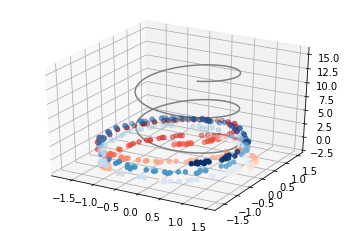

In [ ]:
predict = model.predict(X_test)
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model.layers[0].output
encoder = Model(inputs= model.inputs, outputs=encoded)
x_train_2d = encoder.predict(X_train)

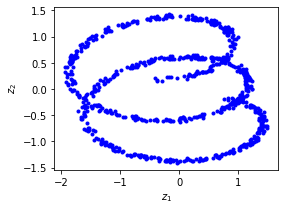

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_2d[: ,0] , x_train_2d[: ,1] , "b.")
plt.xlabel(" $z_1$ ")
plt.ylabel(" $z_2$ ")
plt.show();

Linear 1d

In [ ]:
opt = Adam()

model2 = Sequential(name = 'model1')
model2.add(Dense(1, input_shape=(3,), name = 'coder'))
model2.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model2.compile(optimizer=opt, loss = mse)
model2.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 1)                 4         
_________________________________________________________________
decoder (Dense)              (None, 3)                 6         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history = model2.fit(x=X_train, y=X_train, epochs=500, verbose=1)

Epoch 1/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0564
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9756
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9097
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9028
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8938
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8529
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8335
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8035
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7466
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7719
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7443
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7450
Epoch 13/500
25/25 [=================

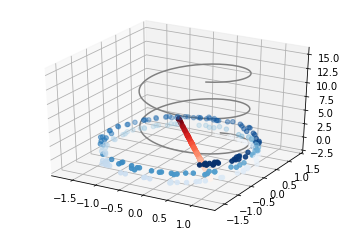

In [ ]:
predict = model2.predict(X_test)
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model2.layers[0].output
encoder = Model(inputs= model2.inputs, outputs=encoded)
x_train_1d = encoder.predict(X_train)

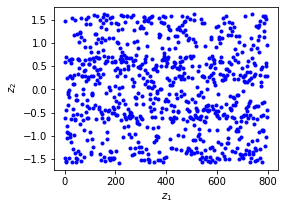

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_1d[: ,0] , "b.")
plt.xlabel(" $z_1$ ")
plt.ylabel(" $z_2$ ")
plt.show();

Non-linear 2d

In [ ]:
opt = Adam()

model3 = Sequential(name = 'model1')
model3.add(Dense(2, input_shape=(3,), name = 'coder', activation="tanh"))
model3.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model3.compile(optimizer=opt, loss = mse)
model3.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 2)                 8         
_________________________________________________________________
decoder (Dense)              (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history = model3.fit(x=X_train, y=X_train, epochs=500, verbose=1)

Epoch 1/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9944
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9457
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9049
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8648
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8292
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7929
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7325
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7326
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7036
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6589
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6434
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6299
Epoch 13/500
25/25 [=================

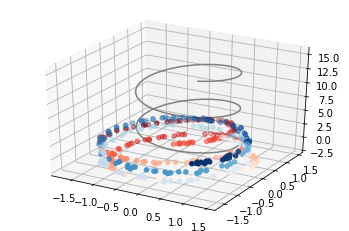

In [ ]:
predict = model3.predict(X_test)
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model3.layers[0].output
encoder = Model(inputs= model3.inputs, outputs=encoded)
x_train_nl_2d = encoder.predict(X_train)

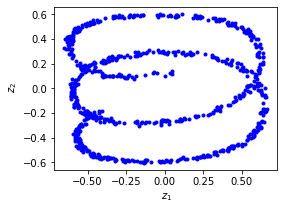

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_nl_2d[: ,0] , x_train_nl_2d[: ,1], "b.")
plt.xlabel(" $z_1$ ")
plt.ylabel(" $z_2$ ")
plt.show();

Non-linear 1d

In [ ]:
opt = Adam()

model4 = Sequential(name = 'model1')
model4.add(Dense(1, input_shape=(3,), name = 'coder', activation="tanh"))
model4.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model4.compile(optimizer=opt, loss = mse)
model4.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 1)                 4         
_________________________________________________________________
decoder (Dense)              (None, 3)                 6         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history = model4.fit(x=X_train, y=X_train, epochs=500, verbose=1)

Epoch 1/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9919
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9709
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9385
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9483
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8956
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8768
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8783
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8525
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8359
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8154
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8098
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7998
Epoch 13/500
25/25 [=================

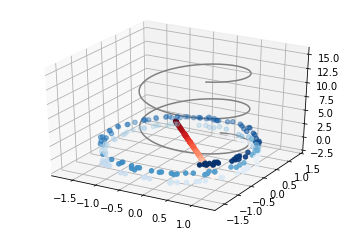

In [ ]:
predict = model4.predict(X_test)
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model4.layers[0].output
encoder = Model(inputs= model4.inputs, outputs=encoded)
x_train_nl_1d = encoder.predict(X_train)

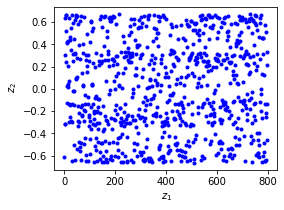

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_nl_1d[: ,0] , "b.")
plt.xlabel(" $z_1$ ")
plt.ylabel(" $z_2$ ")
plt.show();

Part 2

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train = datagen.flow_from_directory('data/train/', color_mode="rgb", class_mode="binary", batch_size=64, target_size=(64,64))
test = datagen.flow_from_directory('data/test/', color_mode="rgb", class_mode="binary", batch_size=64, target_size=(64,64))
valid = datagen.flow_from_directory('data/valid/', color_mode="rgb", class_mode="binary", batch_size=64, target_size=(64,64))

Found 19899 images belonging to 2 classes.
Found 2539 images belonging to 2 classes.
Found 2545 images belonging to 2 classes.


In [8]:
def create_autoencoder(units, noise_type, noise_param, activation):
    orig_dim=(64, 64, 3)
    orig_flat_dim = np.prod(orig_dim)
    encoded_dim = (units[-1],)

    input_enc = Input(orig_dim)
    x = Flatten()(input_enc)

    if noise_type == 'dropout':
        x = Dropout(noise_param)(x)
    elif noise_type == 'gaussian':
        x = GaussianNoise(noise_param)(x)

    for u in units:
        x = Dense(u, activation=activation)(x)
    encoded = x

    input_dec = Input(encoded_dim)
    x = input_dec

    for u in reversed(units[:-1]):
        x = Dense(u, activation=activation)(x)

    x = Dense(orig_flat_dim, activation='sigmoid')(x)
    decoded = Reshape(orig_dim)(x)

    encoder = Model(input_enc, encoded, name="encoder")
    decoder = Model(input_dec, decoded, name="decoder")
    autoencoder = Model(input_enc, decoder(encoder(input_enc)), name="autoencoder")
    return encoder, decoder, autoencoder

In [9]:
X, Y = zip(*(train[i] for i in range(len(train)-1)))
X, Y = np.vstack(X), np.vstack(Y)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [10]:
Y = Y.reshape(-1,1)

In [11]:
X_v, Y_v = zip(*(valid[i] for i in range(len(valid)-1)))
X_v, Y_v = np.vstack(X_v), np.vstack(Y_v)

In [12]:
Y_v = Y_v.reshape(-1,1)

In [13]:
X_t, Y_t = zip(*(test[i] for i in range(len(test)-1)))
X_t, Y_t = np.vstack(X_t), np.vstack(Y_t)

In [14]:
Y_t = Y_t.reshape(-1,1)

In [15]:
test2 = []
for i in range(1,22):
    test2.append(img_to_array(load_img(f'test/{i}.jpg', target_size=(64, 64)))/255)

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'dropout', 0.2, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 13s 16ms/step - loss: 0.0389 - val_loss: 0.0260
Epoch 2/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0251 - val_loss: 0.0233
Epoch 3/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0228 - val_loss: 0.0225
Epoch 4/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0217 - val_loss: 0.0212
Epoch 5/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0209 - val_loss: 0.0209
Epoch 6/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0202 - val_loss: 0.0202
Epoch 7/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0199 - val_loss: 0.0202
Epoch 8/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0196 - val_loss: 0.0202
Epoch 9/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0194 - val_loss: 0.0196
Epoch 10/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0191

1/1 [==============================] - 0s 111ms/step
dropout 0.2, [1024, 512, 256], elu, 50epoch


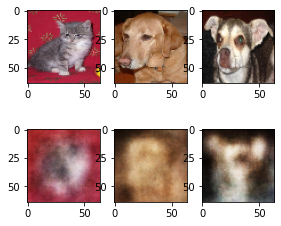

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.2, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 53ms/step
dropout 0.2, [1024, 512, 256], elu, 50epoch


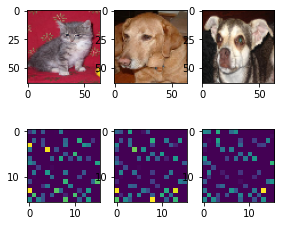

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.2, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'gaussian', 0.2, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0394 - val_loss: 0.0260
Epoch 2/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0250 - val_loss: 0.0228
Epoch 3/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0223 - val_loss: 0.0228
Epoch 4/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0215 - val_loss: 0.0222
Epoch 5/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0207 - val_loss: 0.0213
Epoch 6/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0202 - val_loss: 0.0201
Epoch 7/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0199 - val_loss: 0.0203
Epoch 8/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0195 - val_loss: 0.0194
Epoch 9/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0191 - val_loss: 0.0202
Epoch 10/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0189 - v

1/1 [==============================] - 0s 84ms/step
gaussian 0.2, [1024, 512, 256], elu, 50epoch


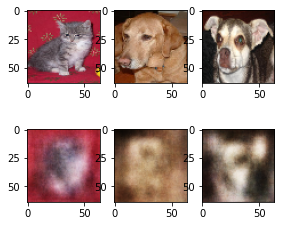

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.2, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 52ms/step
gaussian 0.2, [1024, 512, 256], elu, 50epoch


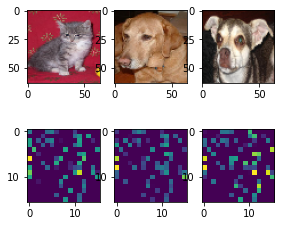

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.2, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([2048, 1024, 512, 256], 'dropout', 0.5, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 18s 28ms/step - loss: 0.0449 - val_loss: 0.0326
Epoch 2/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0315 - val_loss: 0.0304
Epoch 3/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0297 - val_loss: 0.0284
Epoch 4/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0281 - val_loss: 0.0275
Epoch 5/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0273 - val_loss: 0.0268
Epoch 6/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0265 - val_loss: 0.0261
Epoch 7/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0262 - val_loss: 0.0263
Epoch 8/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0260 - val_loss: 0.0253
Epoch 9/50
620/620 [==============================] - 17s 28ms/step - loss: 0.0255 - val_loss: 0.0251
Epoch 10/50
620/620 [==============================] - 17s 28ms/step - loss: 0.025

1/1 [==============================] - 0s 112ms/step
gaussian 0.5, [2048, 1024, 512, 256], elu, 50epoch


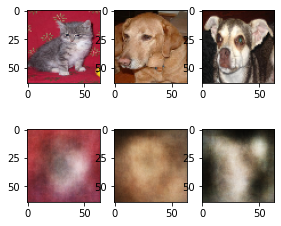

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.5, [2048, 1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 64ms/step
dropout 0.2, [2048, 1024, 512, 256], elu, 50epoch


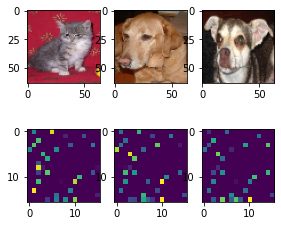

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.2, [2048, 1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'dropout', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 11s 16ms/step - loss: 0.0518 - val_loss: 0.0338
Epoch 2/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0316 - val_loss: 0.0311
Epoch 3/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0302 - val_loss: 0.0290
Epoch 4/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0283 - val_loss: 0.0276
Epoch 5/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0270 - val_loss: 0.0273
Epoch 6/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0267 - val_loss: 0.0265
Epoch 7/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0259 - val_loss: 0.0263
Epoch 8/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0254 - val_loss: 0.0255
Epoch 9/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0247 - val_loss: 0.0251
Epoch 10/50
620/620 [==============================] - 10s 16ms/step - loss: 0.024

1/1 [==============================] - 0s 98ms/step
dropout 0.3, [1024, 512, 256], relu, 50epoch


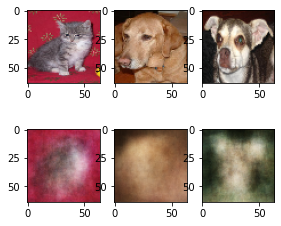

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 512, 256], relu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 57ms/step
dropout 0.3, [1024, 512, 256], relu, 50epoch


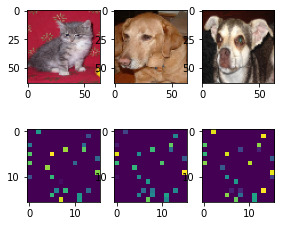

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 512, 256], relu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'gaussian', 0.3, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0402 - val_loss: 0.0265
Epoch 2/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0254 - val_loss: 0.0234
Epoch 3/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0232 - val_loss: 0.0227
Epoch 4/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0223 - val_loss: 0.0222
Epoch 5/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0216 - val_loss: 0.0217
Epoch 6/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0211 - val_loss: 0.0213
Epoch 7/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0209 - val_loss: 0.0210
Epoch 8/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0205 - val_loss: 0.0208
Epoch 9/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0203 - val_loss: 0.0206
Epoch 10/50
620/620 [==============================] - 10s 16ms/step - loss: 0.020

1/1 [==============================] - 0s 89ms/step
gaussian 0.3, [1024, 512, 256], elu, 50epoch


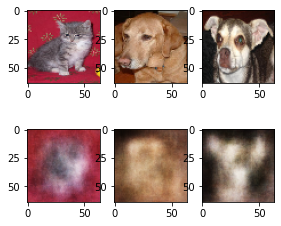

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.3, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 53ms/step
gaussian 0.3, [1024, 512, 256], elu, 50epoch


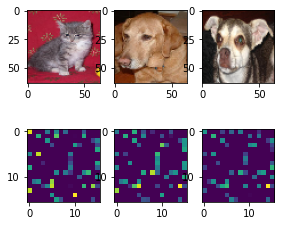

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.3, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'gaussian', 0.1, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0402 - val_loss: 0.0257
Epoch 2/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0249 - val_loss: 0.0240
Epoch 3/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0225 - val_loss: 0.0214
Epoch 4/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0211 - val_loss: 0.0211
Epoch 5/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0205 - val_loss: 0.0208
Epoch 6/50
620/620 [==============================] - 10s 16ms/step - loss: 0.0198 - val_loss: 0.0201
Epoch 7/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0195 - val_loss: 0.0195
Epoch 8/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0189 - val_loss: 0.0196
Epoch 9/50
620/620 [==============================] - 10s 15ms/step - loss: 0.0187 - val_loss: 0.0197
Epoch 10/50
620/620 [==============================] - 9s 15ms/step - loss: 0.0185 - 

1/1 [==============================] - 0s 100ms/step
gaussian 0.1, [1024, 512, 256], elu, 50epoch


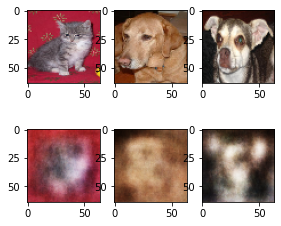

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.1, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 65ms/step
gaussian 0.1, [1024, 512, 256], elu, 50epoch


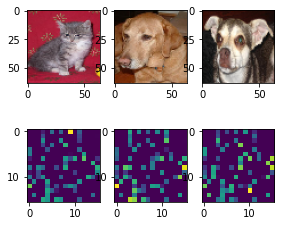

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.1, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

Best model #1

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([512, 256], 'gaussian', 0.1, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 7s 10ms/step - loss: 0.0356 - val_loss: 0.0216
Epoch 2/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0208 - val_loss: 0.0194
Epoch 3/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0190 - val_loss: 0.0188
Epoch 4/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0180 - val_loss: 0.0179
Epoch 5/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0176 - val_loss: 0.0180
Epoch 6/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0173 - val_loss: 0.0176
Epoch 7/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0170 - val_loss: 0.0172
Epoch 8/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0168 - val_loss: 0.0172
Epoch 9/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0165 - val_loss: 0.0174
Epoch 10/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0166 - val_lo

1/1 [==============================] - 0s 78ms/step
gaussian 0.1, [512, 256], elu, 50epoch


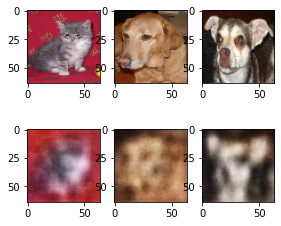

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.1, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 43ms/step
gaussian 0.1, [512, 256], elu, 50epoch


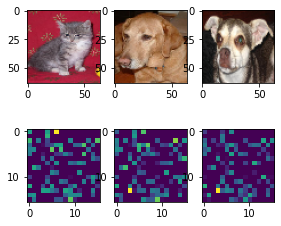

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.1, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

Best model 2

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([512, 256], 'gaussian', 0.2, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 7s 10ms/step - loss: 0.0358 - val_loss: 0.0221
Epoch 2/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0211 - val_loss: 0.0196
Epoch 3/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0191 - val_loss: 0.0188
Epoch 4/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0182 - val_loss: 0.0183
Epoch 5/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0177 - val_loss: 0.0175
Epoch 6/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 7/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0170 - val_loss: 0.0173
Epoch 8/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0167 - val_loss: 0.0168
Epoch 9/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0167 - val_loss: 0.0167
Epoch 10/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0165 - val_lo

1/1 [==============================] - 0s 75ms/step
gaussian 0.2, [512, 256], elu, 50epoch


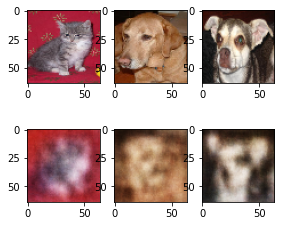

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.2, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 17ms/step
gaussian 0.2, [512, 256], elu, 50epoch


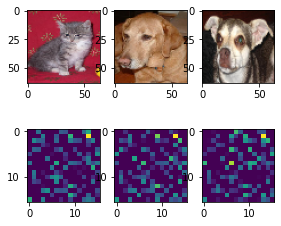

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.2, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

Best model 3

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([512, 256], 'dropout', 0.1, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 7s 10ms/step - loss: 0.0357 - val_loss: 0.0220
Epoch 2/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0212 - val_loss: 0.0198
Epoch 3/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0194 - val_loss: 0.0191
Epoch 4/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0187 - val_loss: 0.0186
Epoch 5/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0180 - val_loss: 0.0184
Epoch 6/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0175 - val_loss: 0.0181
Epoch 7/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0172 - val_loss: 0.0175
Epoch 8/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0171 - val_loss: 0.0175
Epoch 9/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0168 - val_loss: 0.0171
Epoch 10/50
620/620 [==============================] - 6s 9ms/step - loss: 0.0169 - val_loss: 0.016

1/1 [==============================] - 0s 78ms/step
dropout 0.1, [512, 256], elu, 50epoch


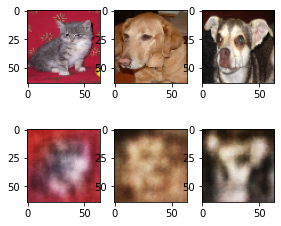

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.1, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 48ms/step
dropout 0.1, [512, 256], elu, 50epoch


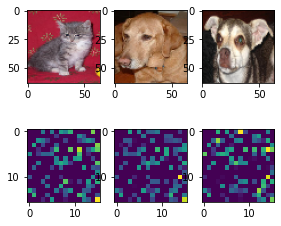

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.1, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([512, 256], 'dropout', 0.2, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 7s 10ms/step - loss: 0.0359 - val_loss: 0.0221
Epoch 2/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0214 - val_loss: 0.0201
Epoch 3/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 4/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0188 - val_loss: 0.0184
Epoch 5/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0182 - val_loss: 0.0179
Epoch 6/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0179 - val_loss: 0.0178
Epoch 7/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0176 - val_loss: 0.0176
Epoch 8/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0174 - val_loss: 0.0177
Epoch 9/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0173 - val_loss: 0.0173
Epoch 10/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0170 - val_lo

1/1 [==============================] - 0s 77ms/step
dropout 0.2, [512, 256], elu, 50epoch


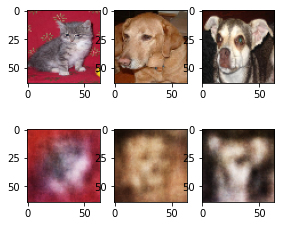

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.2, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 53ms/step
dropout 0.2, [512, 256], elu, 50epoch


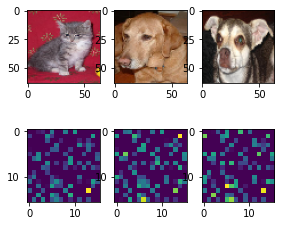

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.2, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([512, 256], 'dropout', 0.3, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
620/620 [==============================] - 7s 10ms/step - loss: 0.0356 - val_loss: 0.0225
Epoch 2/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0217 - val_loss: 0.0203
Epoch 3/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0199 - val_loss: 0.0194
Epoch 4/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0191 - val_loss: 0.0183
Epoch 5/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0186 - val_loss: 0.0185
Epoch 6/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0183 - val_loss: 0.0179
Epoch 7/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0180 - val_loss: 0.0178
Epoch 8/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0179 - val_loss: 0.0178
Epoch 9/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0178 - val_loss: 0.0180
Epoch 10/50
620/620 [==============================] - 6s 10ms/step - loss: 0.0177 - val_lo

1/1 [==============================] - 0s 82ms/step
dropout 0.3, [512, 256], elu, 50epoch


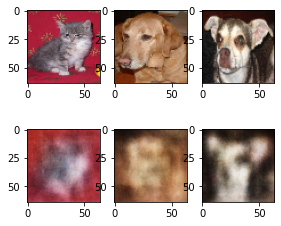

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

1/1 [==============================] - 0s 44ms/step
dropout 0.3, [512, 256], elu, 50epoch


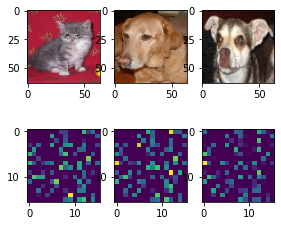

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

**2.8**  chosen model - best #3

In [ ]:
model = Sequential()
model.add(encoder)
model.add(Dense(1, 'sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(x=X, y=Y, validation_data=(X_v, Y_v), epochs=50, verbose=1, callbacks=[early_stop_callback])

Epoch 1/50
620/620 [==============================] - 6s 8ms/step - loss: 0.9821 - accuracy: 0.5489 - auc: 0.5654 - val_loss: 0.6602 - val_accuracy: 0.6026 - val_auc: 0.6482
Epoch 2/50
620/620 [==============================] - 5s 8ms/step - loss: 0.6607 - accuracy: 0.6099 - auc: 0.6496 - val_loss: 0.6644 - val_accuracy: 0.5825 - val_auc: 0.6498
Epoch 3/50
620/620 [==============================] - 5s 8ms/step - loss: 0.6467 - accuracy: 0.6215 - auc: 0.6709 - val_loss: 0.6415 - val_accuracy: 0.6290 - val_auc: 0.6867
Epoch 4/50
620/620 [==============================] - 5s 8ms/step - loss: 0.6449 - accuracy: 0.6194 - auc: 0.6713 - val_loss: 0.6832 - val_accuracy: 0.5873 - val_auc: 0.6659
Epoch 5/50
620/620 [==============================] - 5s 8ms/step - loss: 0.6395 - accuracy: 0.6312 - auc: 0.6820 - val_loss: 0.6553 - val_accuracy: 0.6042 - val_auc: 0.6947
Epoch 6/50
620/620 [==============================] - 5s 8ms/step - loss: 0.6310 - accuracy: 0.6404 - auc: 0.6943 - val_loss: 0.63

In [ ]:
model2 = Sequential()
model2.add(encoder)
model2.add(Dense(1, 'sigmoid'))
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
with tf.device('/device:GPU:0'):
  history = model2.fit(x=X[:2000], y=Y[:2000], validation_data=(X_v, Y_v), epochs=50, verbose=1, callbacks=[early_stop_callback])

Epoch 1/50
63/63 [==============================] - 2s 19ms/step - loss: 0.8165 - accuracy: 0.5354 - auc: 0.5714 - val_loss: 0.6484 - val_accuracy: 0.6234 - val_auc: 0.6724
Epoch 2/50
63/63 [==============================] - 1s 14ms/step - loss: 0.6320 - accuracy: 0.6543 - auc: 0.6986 - val_loss: 0.6538 - val_accuracy: 0.6322 - val_auc: 0.6886
Epoch 3/50
63/63 [==============================] - 1s 14ms/step - loss: 0.6089 - accuracy: 0.6657 - auc: 0.7262 - val_loss: 0.6619 - val_accuracy: 0.5982 - val_auc: 0.6764
Epoch 4/50
63/63 [==============================] - 1s 14ms/step - loss: 0.5989 - accuracy: 0.6652 - auc: 0.7340 - val_loss: 0.6409 - val_accuracy: 0.6374 - val_auc: 0.6926
Epoch 5/50
63/63 [==============================] - 1s 14ms/step - loss: 0.5757 - accuracy: 0.6815 - auc: 0.7625 - val_loss: 0.6619 - val_accuracy: 0.6078 - val_auc: 0.6800
Epoch 6/50
63/63 [==============================] - 1s 14ms/step - loss: 0.5755 - accuracy: 0.6907 - auc: 0.7628 - val_loss: 0.6608 - v

In [ ]:
model3 = Sequential()
model3.add(encoder)
model3.add(Dense(1, 'sigmoid'))
model3.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
with tf.device('/device:GPU:0'):
  history = model3.fit(x=X, y=Y, validation_data=(X_v, Y_v), epochs=25, verbose=1)

Epoch 1/25
620/620 [==============================] - 6s 9ms/step - loss: 0.6498 - accuracy: 0.6269 - auc: 0.6743 - val_loss: 0.6688 - val_accuracy: 0.6050 - val_auc: 0.6883
Epoch 2/25
620/620 [==============================] - 5s 8ms/step - loss: 0.6159 - accuracy: 0.6541 - auc: 0.7172 - val_loss: 0.6388 - val_accuracy: 0.6474 - val_auc: 0.7007
Epoch 3/25
620/620 [==============================] - 5s 8ms/step - loss: 0.6057 - accuracy: 0.6701 - auc: 0.7317 - val_loss: 0.6367 - val_accuracy: 0.6418 - val_auc: 0.7075
Epoch 4/25
620/620 [==============================] - 5s 8ms/step - loss: 0.6052 - accuracy: 0.6656 - auc: 0.7306 - val_loss: 0.6316 - val_accuracy: 0.6326 - val_auc: 0.7126
Epoch 5/25
620/620 [==============================] - 5s 8ms/step - loss: 0.5930 - accuracy: 0.6764 - auc: 0.7445 - val_loss: 0.6245 - val_accuracy: 0.6354 - val_auc: 0.7000
Epoch 6/25
620/620 [==============================] - 5s 8ms/step - loss: 0.5874 - accuracy: 0.6781 - auc: 0.7502 - val_loss: 0.63

In [ ]:
model4 = Sequential()
model4.add(encoder)
model4.add(Dense(1, 'sigmoid'))
model4.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
with tf.device('/device:GPU:0'):
  history = model4.fit(x=X, y=Y, validation_data=(X_v, Y_v), epochs=10, verbose=1)

Epoch 1/10
620/620 [==============================] - 6s 9ms/step - loss: 0.4790 - accuracy: 0.7675 - auc: 0.8502 - val_loss: 0.6974 - val_accuracy: 0.6474 - val_auc: 0.7136
Epoch 2/10
620/620 [==============================] - 5s 8ms/step - loss: 0.4621 - accuracy: 0.7754 - auc: 0.8602 - val_loss: 0.7154 - val_accuracy: 0.6422 - val_auc: 0.7126
Epoch 3/10
620/620 [==============================] - 5s 8ms/step - loss: 0.4448 - accuracy: 0.7828 - auc: 0.8720 - val_loss: 0.7499 - val_accuracy: 0.6406 - val_auc: 0.7066
Epoch 4/10
620/620 [==============================] - 5s 8ms/step - loss: 0.4373 - accuracy: 0.7904 - auc: 0.8767 - val_loss: 0.7881 - val_accuracy: 0.6490 - val_auc: 0.7023
Epoch 5/10
620/620 [==============================] - 5s 8ms/step - loss: 0.4398 - accuracy: 0.7862 - auc: 0.8738 - val_loss: 0.7327 - val_accuracy: 0.6530 - val_auc: 0.7108
Epoch 6/10
620/620 [==============================] - 5s 8ms/step - loss: 0.4318 - accuracy: 0.7885 - auc: 0.8792 - val_loss: 0.73

In [ ]:
model5 = Sequential()
model5.add(encoder)
model5.add(Dense(1, 'sigmoid'))
model5.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
with tf.device('/device:GPU:0'):
  history = model5.fit(x=X[:2000], y=Y[:2000], validation_data=(X_v, Y_v), epochs=10, verbose=1)

Epoch 1/10
63/63 [==============================] - 2s 19ms/step - loss: 0.5578 - accuracy: 0.7692 - auc: 0.8342 - val_loss: 0.7167 - val_accuracy: 0.6446 - val_auc: 0.7034
Epoch 2/10
63/63 [==============================] - 1s 14ms/step - loss: 0.3460 - accuracy: 0.8537 - auc: 0.9295 - val_loss: 0.7770 - val_accuracy: 0.6558 - val_auc: 0.7116
Epoch 3/10
63/63 [==============================] - 1s 14ms/step - loss: 0.2650 - accuracy: 0.8874 - auc: 0.9606 - val_loss: 0.8988 - val_accuracy: 0.6510 - val_auc: 0.7119
Epoch 4/10
63/63 [==============================] - 1s 15ms/step - loss: 0.2853 - accuracy: 0.8667 - auc: 0.9528 - val_loss: 0.8290 - val_accuracy: 0.6595 - val_auc: 0.7074
Epoch 5/10
63/63 [==============================] - 1s 14ms/step - loss: 0.2501 - accuracy: 0.9018 - auc: 0.9629 - val_loss: 0.9685 - val_accuracy: 0.6534 - val_auc: 0.7081
Epoch 6/10
63/63 [==============================] - 1s 15ms/step - loss: 0.2401 - accuracy: 0.8991 - auc: 0.9655 - val_loss: 0.9242 - v

PART 3

In [ ]:
# def create_var_auto(latent, batch_size=32):
#     models = {}
#     input_img = Input(batch_shape=(batch_size, 64, 64, 3))
#     x = Flatten()(input_img)
#     x = Dense(512, activation='elu')(x)
#     x = Dense(256, activation='elu')(x)
#     z_mean = Dense(latent)(x)
#     z_log_var = Dense(latent)(x)

#     def sampling(args):
#         z_mean, z_log_var = args
#         epsilon = K.random_normal(shape=(batch_size, latent), mean=0., stddev=1.0)
#         return z_mean + K.exp(z_log_var / 2) * epsilon

#     l = Lambda(sampling, output_shape=(latent,))([z_mean, z_log_var])

#     models["encoder"]  = Model(input_img, l, name='Encoder') 
#     models["z_meaner"] = Model(input_img, z_mean, name='Enc_z_mean')
#     models["z_lvarer"] = Model(input_img, z_log_var, name='Enc_z_log_var')


#     z = Input(shape=(latent,))
#     x = Dense(256, activation='elu')(z)
#     x = Dense(512, activation='elu')(x)
#     x = Dense(64*64*3, activation='sigmoid')(x)
#     decoded = Reshape((64, 64, 3))(x)

#     models["decoder"] = Model(z, decoded, name='Decoder')
#     models["vae"] = Model(input_img, models["decoder"](models["encoder"](input_img)), name="VAE")

#     def vae_loss(x, decoded):
#         x = K.reshape(x, shape=(batch_size, 64*64*3))
#         decoded = K.reshape(decoded, shape=(batch_size, 64*64*3))
#         xent_loss = 64*64*3*binary_crossentropy(x, decoded)
#         kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
#         return (xent_loss + kl_loss)/2/64/64/3

#     return models, vae_loss

In [ ]:
original_dim = 64*64*3
latent_dim = 256

inputs = Input(shape=(original_dim,))
h = Dense(1024, activation='relu')(inputs)
#h = Dense(512, activation='elu')(h)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [ ]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
encoder =Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
#x = Dense(512, activation='elu')(latent_inputs)
x = Dense(1024, activation='relu')(latent_inputs)
outputs = Dense(64*64*3, activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [ ]:
vae.summary()

Model: "vae_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12288)]           0         
_________________________________________________________________
encoder (Functional)         [(None, 256), (None, 256) 13108736  
_________________________________________________________________
decoder (Functional)         (None, 12288)             12858368  
Total params: 25,967,104
Trainable params: 25,967,104
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reconstruction_loss = mse(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam())

In [ ]:
X_vae = X.reshape((len(X), np.prod(X.shape[1:])))
X_val_vae = X_v.reshape((len(X_v), np.prod(X_v.shape[1:])))

In [ ]:
stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min",
    restore_best_weights=True,
)

In [ ]:
vae.fit(X_vae, X_vae,epochs=300, batch_size=32, validation_data=(X_val_vae, X_val_vae), callbacks=stop)

Epoch 1/300
620/620 [==============================] - 6s 10ms/step - loss: 2262.7741 - val_loss: 546.7986
Epoch 2/300
620/620 [==============================] - 6s 9ms/step - loss: 532.7380 - val_loss: 401.7949
Epoch 3/300
620/620 [==============================] - 6s 9ms/step - loss: 365.1989 - val_loss: 310.5421
Epoch 4/300
620/620 [==============================] - 6s 9ms/step - loss: 295.8916 - val_loss: 279.5016
Epoch 5/300
620/620 [==============================] - 6s 9ms/step - loss: 269.4057 - val_loss: 262.7434
Epoch 6/300
620/620 [==============================] - 6s 9ms/step - loss: 251.0681 - val_loss: 253.1856
Epoch 7/300
620/620 [==============================] - 6s 9ms/step - loss: 240.4404 - val_loss: 247.3767
Epoch 8/300
620/620 [==============================] - 6s 9ms/step - loss: 235.0492 - val_loss: 241.5727
Epoch 9/300
620/620 [==============================] - 6s 9ms/step - loss: 230.0275 - val_loss: 240.4345
Epoch 10/300
620/620 [==============================]

In [ ]:
test2_n = np.array(test2)

In [ ]:
test2_vae = test2_n.reshape((len(test2_n), np.prod(test2_n.shape[1:])))

1/1 [==============================] - 0s 16ms/step


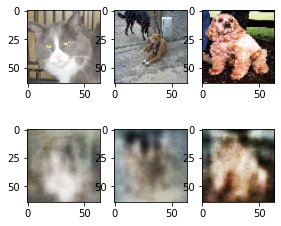

In [ ]:
pred = vae.predict(test2_vae, batch_size=21, verbose=1)
for i in range(5, 8):
    plt.subplot(2,4,-4+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i)
    plt.imshow(pred[i+4].reshape(64, 64,3))
plt.show()

Generating images

In [ ]:
rand_nums = np.random.normal(0.3, 0.8, (1, 256))

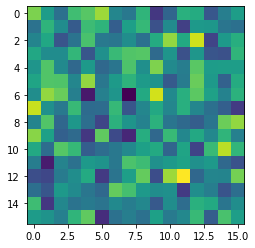

In [ ]:
plt.imshow(rand_nums.reshape(16,16))

In [ ]:
pred= decoder.predict(rand_nums, batch_size=21, verbose=1)

1/1 [==============================] - 0s 18ms/step


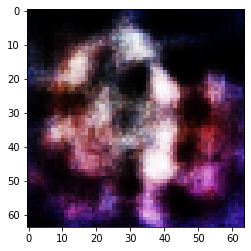

In [ ]:
plt.imshow(pred.reshape(64, 64,3))

In [ ]:
# saved model
vae.save('drive/MyDrive/model_part3')

INFO:tensorflow:Assets written to: drive/MyDrive/model_part3/assets


In [ ]:
enc = vae.layers[1].predict(test2_vae[10].reshape(1,-1), batch_size=21, verbose=1)[2]

1/1 [==============================] - 0s 15ms/step


In [ ]:
enc[0].std()

0.25890213

In [ ]:
enc[0].mean()

-0.01359272

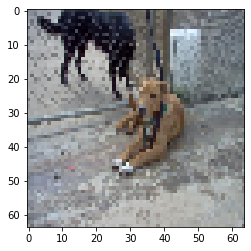

In [ ]:
plt.imshow(test2_vae[10].reshape(64,64,3))

In [ ]:
test9_rand = np.random.normal(-0.014223121, 0.26690614, (1, 256))

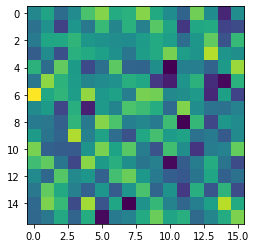

In [ ]:
plt.imshow(test9_rand.reshape(16,16))

In [ ]:
pred = decoder.predict(test9_rand, batch_size=21, verbose=1)

1/1 [==============================] - 0s 14ms/step


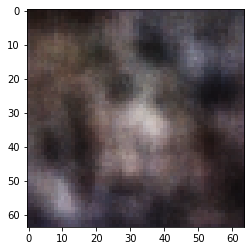

In [ ]:
plt.imshow(pred.reshape(64, 64,3))

Part 4


In [ ]:
h20_enc, h20_dec, hasher20 = create_autoencoder([512, 256, 20], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher20.compile(optimizer=opt, loss = mse)
stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min",
    restore_best_weights=True,
)
with tf.device('/device:GPU:0'):
  hasher20.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=80, verbose=1, callbacks=stop)

Epoch 1/80
620/620 [==============================] - 6s 10ms/step - loss: 0.0647 - val_loss: 0.0601
Epoch 2/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0586 - val_loss: 0.0592
Epoch 3/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0591
Epoch 4/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0576 - val_loss: 0.0590
Epoch 5/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0593
Epoch 6/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0591
Epoch 7/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0588
Epoch 8/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0574 - val_loss: 0.0585
Epoch 9/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0561 - val_loss: 0.0547
Epoch 10/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0534 - val_loss: 0.054

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


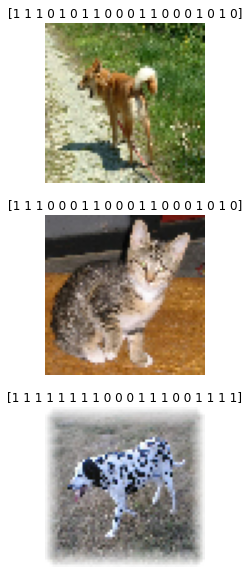

In [ ]:
X_hashed20 = (h20_enc.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (8,10)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed20[i])
    plt.axis('off')
plt.show()

In [ ]:
h30_enc, h30_dec, hasher30 = create_autoencoder([512, 256, 30], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher30.compile(optimizer=opt, loss = mse)
stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min",
    restore_best_weights=True,
)
with tf.device('/device:GPU:0'):
  hasher30.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=80, verbose=1, callbacks=stop)

Epoch 1/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0647 - val_loss: 0.0598
Epoch 2/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0582 - val_loss: 0.0594
Epoch 3/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0583 - val_loss: 0.0591
Epoch 4/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0593
Epoch 5/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0578 - val_loss: 0.0591
Epoch 6/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0591
Epoch 7/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0578 - val_loss: 0.0590
Epoch 8/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0572 - val_loss: 0.0586
Epoch 9/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0576 - val_loss: 0.0560
Epoch 10/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0544 - val_loss: 0.0545

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


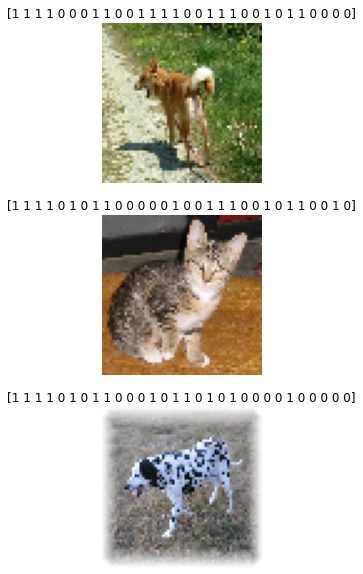

In [ ]:
X_hashed30 = (h30_enc.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (8,10)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed30[i])
    plt.axis('off')
plt.show()

In [ ]:
h40_enc, h40_dec, hasher40 = create_autoencoder([512, 256, 40], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher40.compile(optimizer=opt, loss = mse)
stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min",
    restore_best_weights=True,
)
with tf.device('/device:GPU:0'):
  hasher40.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=80, verbose=1, callbacks=stop)

Epoch 1/80
620/620 [==============================] - 6s 10ms/step - loss: 0.0645 - val_loss: 0.0604
Epoch 2/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0587 - val_loss: 0.0595
Epoch 3/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0581 - val_loss: 0.0595
Epoch 4/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0582 - val_loss: 0.0591
Epoch 5/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0595
Epoch 6/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0575 - val_loss: 0.0590
Epoch 7/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0578 - val_loss: 0.0588
Epoch 8/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0575 - val_loss: 0.0587
Epoch 9/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0573 - val_loss: 0.0586
Epoch 10/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0562 - val_loss: 0.055

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


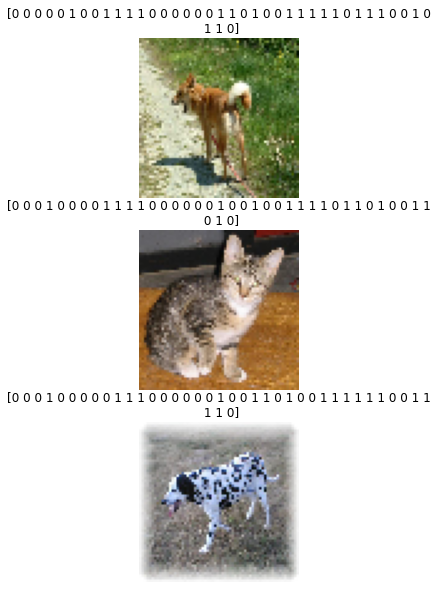

In [ ]:
X_hashed40 = (h40_enc.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (8,10)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed40[i])
    plt.axis('off')
plt.show()

In [ ]:
h128_enc, h128_dec, hasher128 = create_autoencoder([512, 256, 128], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher128.compile(optimizer=opt, loss = mse)
stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min",
    restore_best_weights=True,
)
with tf.device('/device:GPU:0'):
  hasher128.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=80, verbose=1, callbacks=stop)

Epoch 1/80
620/620 [==============================] - 6s 10ms/step - loss: 0.0636 - val_loss: 0.0596
Epoch 2/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0592
Epoch 3/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0578 - val_loss: 0.0595
Epoch 4/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0574 - val_loss: 0.0587
Epoch 5/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0573 - val_loss: 0.0591
Epoch 6/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0574 - val_loss: 0.0589
Epoch 7/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0573 - val_loss: 0.0550
Epoch 8/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0534 - val_loss: 0.0544
Epoch 9/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0533 - val_loss: 0.0546
Epoch 10/80
620/620 [==============================] - 6s 9ms/step - loss: 0.0532 - val_loss: 0.054

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


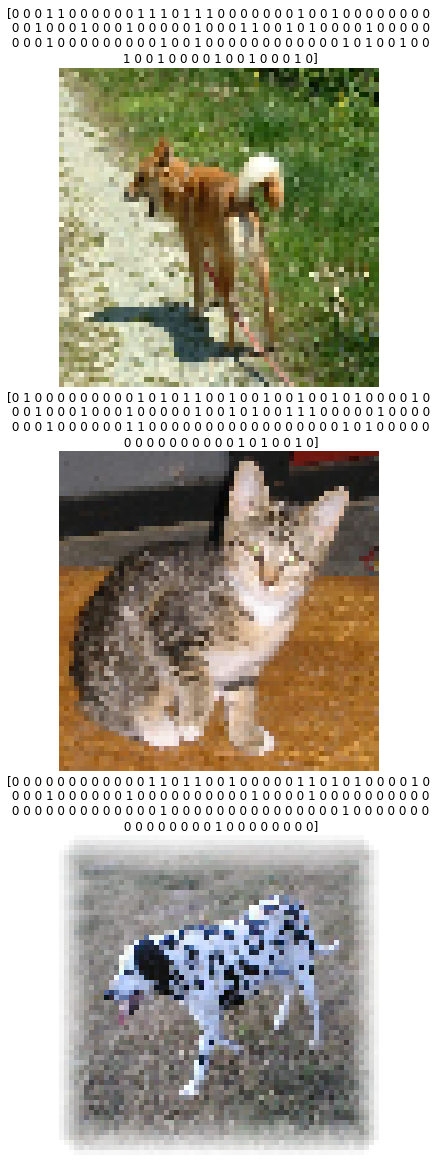

In [ ]:
X_hashed128 = (h128_enc.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (20,20)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed128[i])
    plt.axis('off')
plt.show()

In [ ]:
h20_enc_n, h20_dec_n, hasher20_n = create_autoencoder([512, 256, 20], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher20_n.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher20_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=100, verbose=1, callbacks=stop)

Epoch 1/100
620/620 [==============================] - 6s 10ms/step - loss: 0.0648 - val_loss: 0.0606
Epoch 2/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0587 - val_loss: 0.0600
Epoch 3/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0580 - val_loss: 0.0597
Epoch 4/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0581 - val_loss: 0.0591
Epoch 5/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0575 - val_loss: 0.0590
Epoch 6/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0576 - val_loss: 0.0589
Epoch 7/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0576 - val_loss: 0.0594
Epoch 8/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0575 - val_loss: 0.0588
Epoch 9/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0571 - val_loss: 0.0553
Epoch 10/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0540 - val_l

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


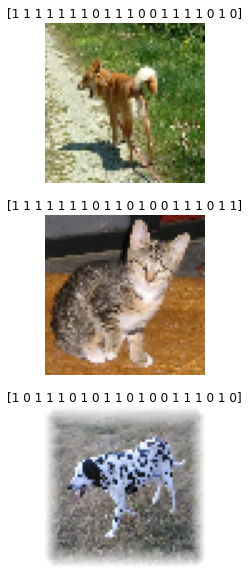

In [ ]:
X_hashed20_n = (h20_enc_n.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (8,10)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed20_n[i])
    plt.axis('off')
plt.show()

In [ ]:
h30_enc_n, h30_dec_n, hasher30_n = create_autoencoder([512, 256, 30], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher30_n.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher30_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=100, verbose=1, callbacks=stop)

Epoch 1/100
620/620 [==============================] - 7s 10ms/step - loss: 0.0644 - val_loss: 0.0601
Epoch 2/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0588 - val_loss: 0.0595
Epoch 3/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0578 - val_loss: 0.0592
Epoch 4/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0580 - val_loss: 0.0591
Epoch 5/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0588
Epoch 6/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0574 - val_loss: 0.0588
Epoch 7/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0573 - val_loss: 0.0587
Epoch 8/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0573 - val_loss: 0.0585
Epoch 9/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0561 - val_loss: 0.0549
Epoch 10/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0533 - val_l

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


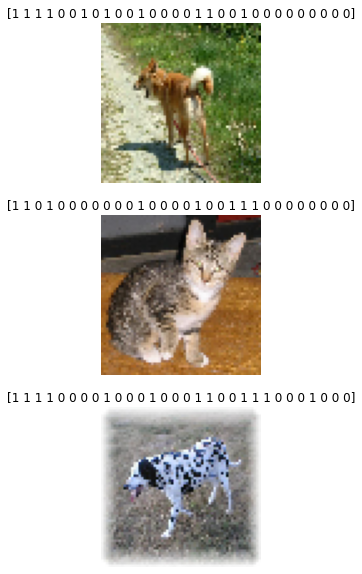

In [ ]:
X_hashed30_n = (h30_enc_n.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (8,10)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed30_n[i])
    plt.axis('off')
plt.show()

In [ ]:
h40_enc_n, h40_dec_n, hasher40_n = create_autoencoder([512, 256, 40], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher40_n.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher40_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=100, verbose=1, callbacks=stop)

Epoch 1/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0638 - val_loss: 0.0599
Epoch 2/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0587 - val_loss: 0.0591
Epoch 3/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0590
Epoch 4/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0575 - val_loss: 0.0590
Epoch 5/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0574 - val_loss: 0.0554
Epoch 6/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0535 - val_loss: 0.0546
Epoch 7/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0531 - val_loss: 0.0543
Epoch 8/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0531 - val_loss: 0.0543
Epoch 9/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0533 - val_loss: 0.0541
Epoch 10/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0529 - val_lo

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


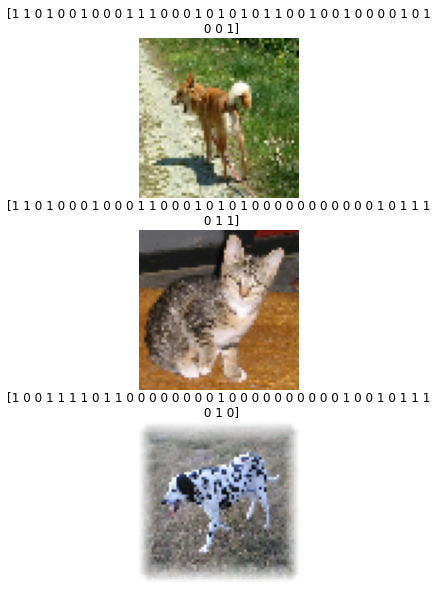

In [ ]:
X_hashed40_n = (h40_enc_n.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (8,10)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed40_n[i])
    plt.axis('off')
plt.show()

In [ ]:
h128_enc_n, h128_dec_n, hasher128_n = create_autoencoder([512, 256, 128], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher128_n.compile(optimizer=opt, loss = mse)
stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min",
    restore_best_weights=True,
)
with tf.device('/device:GPU:0'):
  hasher128_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=100, verbose=1, callbacks=stop)

Epoch 1/100
620/620 [==============================] - 9s 9ms/step - loss: 0.0640 - val_loss: 0.0600
Epoch 2/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0581 - val_loss: 0.0594
Epoch 3/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0578 - val_loss: 0.0592
Epoch 4/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0589
Epoch 5/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0576 - val_loss: 0.0589
Epoch 6/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0576 - val_loss: 0.0588
Epoch 7/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0573 - val_loss: 0.0583
Epoch 8/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0571 - val_loss: 0.0584
Epoch 9/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0563 - val_loss: 0.0550
Epoch 10/100
620/620 [==============================] - 6s 9ms/step - loss: 0.0536 - val_lo

In [ ]:
# saved model
hasher128_n.save('drive/MyDrive/hasher128_n')

INFO:tensorflow:Assets written to: drive/MyDrive/hasher128_n/assets


In [ ]:
hasher128_n = tf.keras.models.load_model('drive/MyDrive/hasher128_n', compile=False)
#hasher128_n.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', f1])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


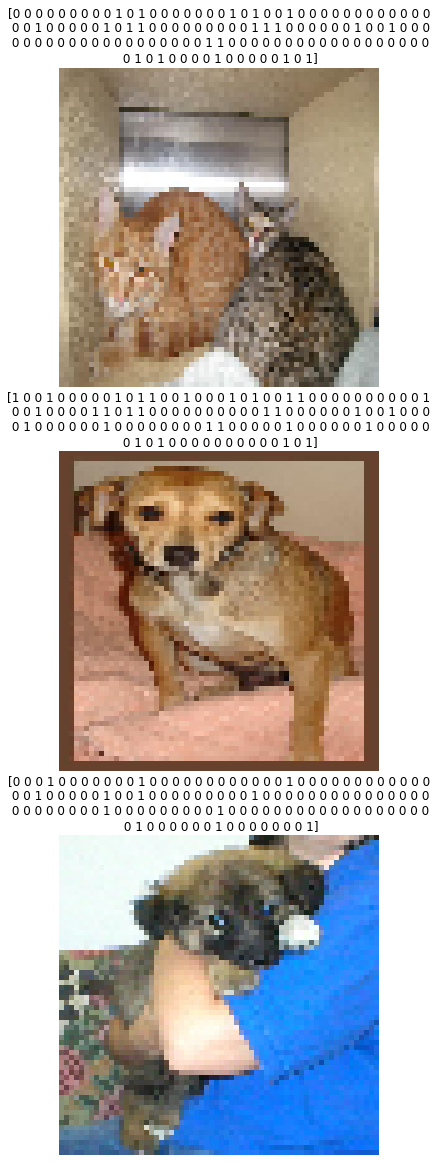

In [ ]:
X_hashed128_n = (h128_enc_n.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (20,20)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed128_n[i])
    plt.axis('off')
plt.show()

In [ ]:
repeat = {}
for j, h in enumerate(X_hashed20_n):
  if str(h) in repeat.keys():
    repeat[str(h)].append(j)
  else:
    repeat[str(h)] = list([j])

In [ ]:
repeat

{'[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]': [995],
 '[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1]': [1446, 8680],
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1]': [8515],
 '[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]': [3532],
 '[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]': [10788, 14396],
 '[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0]': [6161],
 '[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0]': [18865],
 '[0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0]': [3378],
 '[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1]': [7012],
 '[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0]': [18188],
 '[0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0]': [11798],
 '[0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0]': [18330],
 '[0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0]': [2452],
 '[0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1]': [2647, 4208, 15122],
 '[0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1]': [14123],
 '[0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0]': [6833],
 '[0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0]': [14038],
 '[0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0]': [691

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1]


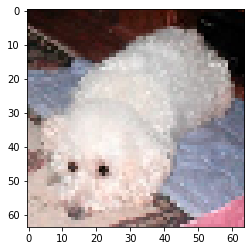

In [ ]:
print(X_hashed20_n[715])
plt.figure(figsize = (4, 4))
plt.imshow(X[715])

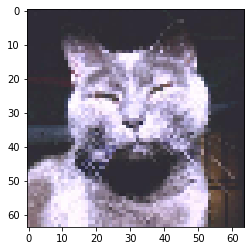

In [ ]:
print(X_hashed20_n[1628])
plt.figure(figsize = (4, 4))
plt.imshow(X[1628])

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1]


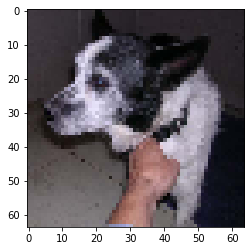

In [ ]:
print(X_hashed20_n[9056])
plt.figure(figsize = (4, 4))
plt.imshow(X[9056])

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1]


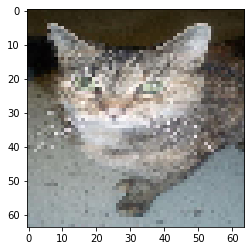

In [ ]:
print(X_hashed20_n[10070])
plt.figure(figsize = (4, 4))
plt.imshow(X[10070])

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1]


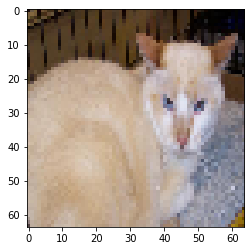

In [ ]:
print(X_hashed20_n[17024])
plt.figure(figsize = (4, 4))
plt.imshow(X[17024])

In [ ]:
repeat = {}
for j, h in enumerate(X_hashed128_n):
  if str(h) in repeat.keys():
    repeat[str(h)].append(j)
  else:
    repeat[str(h)] = list([j])

In [ ]:
repeat

{'[0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0\n 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0\n 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0\n 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0]': [0],
 '[0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0\n 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0\n 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0\n 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1]': [1],
 '[0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0\n 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0\n 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1]': [2],
 '[0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0\n 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1]


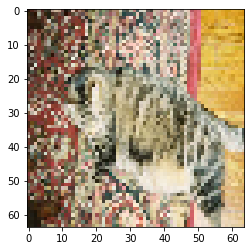

In [ ]:
print(X_hashed128_n[10926])
plt.figure(figsize = (4, 4))
plt.imshow(X[10926])

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1]


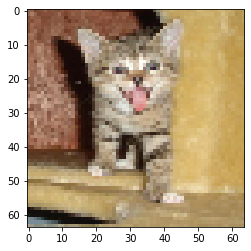

In [ ]:
print(X_hashed128_n[927])
plt.figure(figsize = (4, 4))
plt.imshow(X[927])

In [ ]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [ ]:
X_128 = hasher128_n.predict(X)

In [ ]:
x_flatten = X[:1000].flatten()
X_128_flatten = X_128[:1000].flatten()

In [ ]:
gini_predictions = gini(x_flatten, X_128_flatten)
gini_max = gini(x_flatten, x_flatten)
ngini= gini_normalized(x_flatten, X_128_flatten)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.099, Max. Gini: 0.167, Normalized Gini: 0.594


In [ ]:
# def define_model6():     ### 3 Conv2D + 3 MaxPooling + 1 Dense + Dropout 
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.3))
#     model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.4))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
#     opt = SGD(lr=0.001, momentum=0.9)
#     model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
#     return model

In [ ]:
# model6 = define_model6()
# stop = EarlyStopping(
#     monitor="val_loss",
#     patience=5,
#     mode="min",
#     restore_best_weights=True,
# )

In [ ]:
# with tf.device('/device:GPU:0'):
#   model6.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=30, verbose=1, callbacks=stop)

In [16]:
input_enc = Input((64, 64, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_enc)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

input_dec = Input(encoded.shape[1:])
x = Conv2D(4, (3, 3), activation='relu', padding='same')(input_dec)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

encoder = Model(input_enc, encoded, name="encoder")
encoder.summary()
decoder = Model(input_dec, decoded, name="decoder")
decoder.summary()
autoencoder = Model(input_enc, decoder(encoder(input_enc)), name="autoencoder")

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 4)         580       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 4)           0   

In [19]:
stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min",
    restore_best_weights=True,
)
opt = Adam()
los = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = los)
with tf.device('/device:GPU:0'):
  autoencoder.fit(X, X, validation_data=(X_v, X_v), verbose=1, epochs=100)


Epoch 1/100
620/620 [==============================] - 19s 9ms/step - loss: 0.0307 - val_loss: 0.0173
Epoch 2/100
620/620 [==============================] - 5s 9ms/step - loss: 0.0165 - val_loss: 0.0157
Epoch 3/100
620/620 [==============================] - 5s 9ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 4/100
620/620 [==============================] - 5s 9ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 5/100
620/620 [==============================] - 5s 9ms/step - loss: 0.0143 - val_loss: 0.0145
Epoch 6/100
620/620 [==============================] - 5s 9ms/step - loss: 0.0141 - val_loss: 0.0143
Epoch 7/100
620/620 [==============================] - 5s 8ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 8/100
620/620 [==============================] - 5s 8ms/step - loss: 0.0138 - val_loss: 0.0143
Epoch 9/100
620/620 [==============================] - 5s 9ms/step - loss: 0.0137 - val_loss: 0.0138
Epoch 10/100
620/620 [==============================] - 5s 9ms/step - loss: 0.0136 - val_l

1/1 [==============================] - 0s 282ms/step
gaussian 0.2, [512, 256], elu, 50epoch


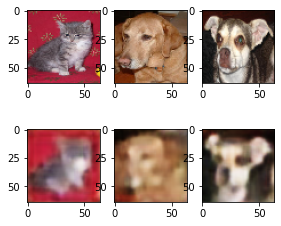

In [20]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.2, [512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

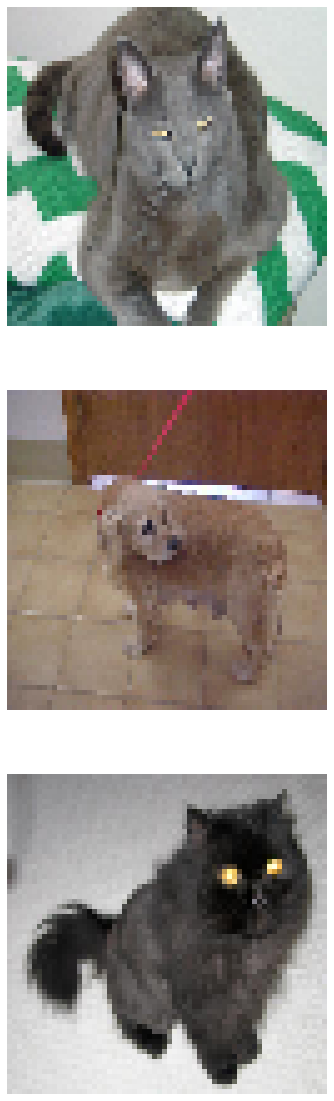

In [24]:
X_hashed_conv = (autoencoder.predict(X) > 0.5).astype('int')
plt.rcParams["figure.figsize"] = (20,20)
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    #plt.title(X_hashed_conv[i])
    plt.axis('off')
plt.show()

In [25]:
repeat = {}
for j, h in enumerate(X_hashed_conv):
  if str(h) in repeat.keys():
    repeat[str(h)].append(j)
  else:
    repeat[str(h)] = list([j])

In [26]:
repeat

{'[[[1 1 1]\n  [1 1 1]\n  [1 1 1]\n  ...\n  [1 1 1]\n  [1 1 1]\n  [1 1 1]]\n\n [[1 1 1]\n  [1 1 1]\n  [1 1 1]\n  ...\n  [1 1 1]\n  [1 1 1]\n  [1 1 1]]\n\n [[1 1 1]\n  [1 1 1]\n  [1 1 1]\n  ...\n  [1 1 1]\n  [1 1 1]\n  [1 1 1]]\n\n ...\n\n [[0 0 0]\n  [0 0 0]\n  [0 0 0]\n  ...\n  [1 1 1]\n  [1 1 1]\n  [1 1 1]]\n\n [[0 0 0]\n  [0 0 0]\n  [0 0 1]\n  ...\n  [1 1 1]\n  [1 1 1]\n  [1 1 1]]\n\n [[0 0 0]\n  [0 0 0]\n  [0 0 1]\n  ...\n  [1 1 1]\n  [1 1 1]\n  [1 1 1]]]': [0],
 '[[[1 1 1]\n  [1 1 1]\n  [1 1 1]\n  ...\n  [0 0 0]\n  [0 0 0]\n  [0 0 0]]\n\n [[1 1 1]\n  [1 1 1]\n  [1 1 1]\n  ...\n  [0 0 0]\n  [0 0 0]\n  [0 0 0]]\n\n [[1 1 1]\n  [1 1 1]\n  [1 1 1]\n  ...\n  [0 0 0]\n  [0 0 0]\n  [0 0 0]]\n\n ...\n\n [[1 0 0]\n  [1 0 0]\n  [1 0 0]\n  ...\n  [1 0 0]\n  [1 0 0]\n  [1 0 0]]\n\n [[1 0 0]\n  [1 0 0]\n  [1 0 0]\n  ...\n  [1 0 0]\n  [1 0 0]\n  [1 0 0]]\n\n [[0 0 0]\n  [1 0 0]\n  [1 0 0]\n  ...\n  [0 0 0]\n  [0 0 0]\n  [0 0 0]]]': [1],
 '[[[0 1 1]\n  [1 1 0]\n  [1 1 1]\n  ...\n  [1 1 1]\n  [1 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


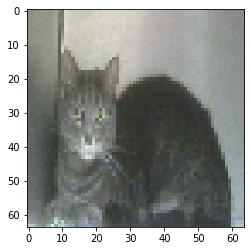

In [27]:
#print(X_hashed_conv[2100])
plt.figure(figsize = (4, 4))
plt.imshow(X[2100])

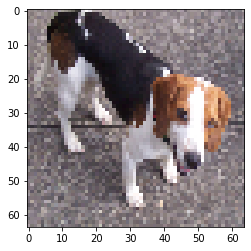

In [28]:
#print(X_hashed_conv[2960])
plt.figure(figsize = (4, 4))
plt.imshow(X[2960])